# Theoretical part

Сгенерим датафрейм для изучения функций:


*   as_type()

*   fillna()

*   dropna()
*   duplicated()


*   drop_duplicates()






## Создадим датасет

Датасет будет состоять из 1500 строк:

In [ ]:
N_ROWS = 1500

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Создадим три количественные фичи датафрейма. Также в некоторые колонки искусственно добавим пропуски с указанным процентом. Нам понадобятся следующие функции:

* `np.random.randint(from, to, num)` - функция, которая создает последовательность случайных числел в указанном первыми двумя аргументами диапазоне в указанном третьим аргументом количестве. Распределение равномерное!
* `np.random.randn(shape)` - создает массив данных указанной формы (многомерный массив или вектор) со стандартизированным Гаусовым распределением.
* `np.random.choice(array, size, p=list)` - позволяет выбрать из массива `array` или списка значения случайным образом в указанном количестве аргументом `size`. Также для каждого элемента можно указать вероятность появления значения аргументом `p`. В нашем примере мы так будем создавать бинарный массив.

In [ ]:
col_1 = np.random.randint(1, 20, N_ROWS).astype(str)
col_2 = np.random.randint(10, 100, N_ROWS)
col_3 = np.random.randn(N_ROWS)*5
null_mask_1 = np.random.choice([0, 1], size=N_ROWS, p=[0.8, 0.2]).astype(bool) # маски для замены значения пропуском
null_mask_2 = np.random.choice([0, 1], size=N_ROWS, p=[0.2, 0.8]).astype(bool)
null_mask_3 = np.random.choice([0, 1], size=N_ROWS, p=[0.6, 0.4]).astype(bool)

In [ ]:
df = pd.DataFrame({'A':col_1,
                   'B':col_2,
                   'C':col_3})
df.loc[null_mask_1, 'A'] = np.nan
df.loc[null_mask_2, 'B'] = np.nan
df.loc[null_mask_3, 'C'] = np.nan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1188 non-null   object 
 1   B       302 non-null    float64
 2   C       892 non-null    float64
dtypes: float64(2), object(1)
memory usage: 35.3+ KB


Coздадим одну категориальную (номинативную) фичу с уникальными значениями `foo`, `bar`, `baz`. Так мы создадим в данных три группы.

In [ ]:
cat = ['foo', 'bar', 'baz']
cat_feature = np.random.choice(cat, size=N_ROWS, p=[0.3, 0.3, 0.4])
df['D'] = cat_feature

NameError: name 'df' is not defined

<Axes: xlabel='count', ylabel='D'>

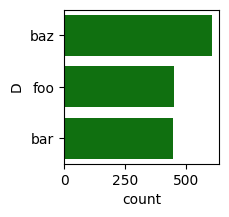

In [ ]:
plt.subplots(figsize=(2, 2))
sns.barplot(x=df.value_counts('D'), y=df.value_counts('D').index, color='green')

Подчеркнем различия по группам для колонки `C`:
* значения для `bar` увеличим на 10
* значения для `baz` уменьшим на 15

In [ ]:
df.loc[df.D == 'bar', 'C'] += 10
df.loc[df.D == 'baz', 'C'] += -15

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1188 non-null   object 
 1   B       302 non-null    float64
 2   C       892 non-null    float64
 3   D       1500 non-null   object 
dtypes: float64(2), object(2)
memory usage: 47.0+ KB


In [ ]:
df.dtypes

,0
A,object
B,float64
C,float64
D,object


In [ ]:
df.head()

,A,B,C,D
0,1,NaN,-15.850581,baz
1,8,NaN,NaN,baz
2,19,40.0,NaN,baz
3,NaN,NaN,NaN,foo
4,NaN,NaN,-16.313302,baz


Оформим весь этот код как функцию:

In [ ]:
def get_data(N_ROWS:int)->pd.DataFrame:
  col_1 = np.random.randint(1, 20, N_ROWS).astype(str)
  col_2 = np.random.randint(10, 100, N_ROWS)
  col_3 = np.random.randn(N_ROWS)*5
  null_mask_1 = np.random.choice([0, 1], size=N_ROWS, p=[0.8, 0.2]).astype(bool) # маски для замены значения пропуском
  null_mask_2 = np.random.choice([0, 1], size=N_ROWS, p=[0.2, 0.8]).astype(bool)
  null_mask_3 = np.random.choice([0, 1], size=N_ROWS, p=[0.6, 0.4]).astype(bool)
  df = pd.DataFrame({'A':col_1,
                    'B':col_2,
                    'C':col_3})
  df.loc[null_mask_1, 'A'] = np.nan
  df.loc[null_mask_2, 'B'] = np.nan
  df.loc[null_mask_3, 'C'] = np.nan
  cat = ['foo', 'bar', 'baz']
  cat_feature = np.random.choice(cat, size=N_ROWS, p=[0.3, 0.3, 0.4])
  df['D'] = cat_feature
  df.loc[df.D == 'bar', 'C'] += 10
  df.loc[df.D == 'baz', 'C'] += -15
  return df

## Заполнение пропусков
`fillna()` - заполняет пропуски указанным значением.

In [ ]:
df.A.fillna(0)

Заполнит пропуски нулем, однако тип данных не изменится.
Более адекватно будет заполнить пропуски каким либо значением, например средним или медианным. Однако, в этом случае необходимо изменить тип данных на числовой.

In [ ]:
df.A.astype(int)

ValueError: cannot convert float NaN to integer

Проблемка... Объект `NaN` - имеет тип `float`, поэтому мы не можем сделать тип всей колонки целочисленным. Заменим тип на `float`:

In [ ]:
df.A = df.A.astype(float)

Оценим распределение в колонке `A`:

<Axes: xlabel='A', ylabel='Density'>

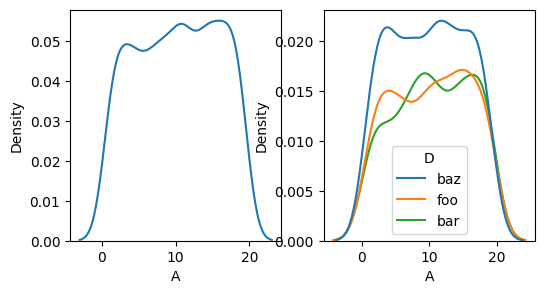

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.kdeplot(data=df, x='A', ax = ax[0])
sns.kdeplot(data=df, x='A', hue='D', ax = ax[1])

Картина характерная для равномерного распределения.

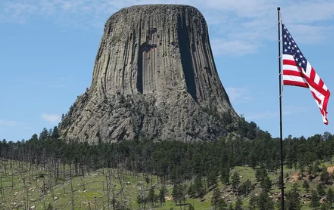

Заполним пропуски средним:

In [ ]:
print(f'Mean by "A" column is {df.A.mean().round(2)}.')
df.A.fillna(df.A.mean().round(2), inplace=True)

Mean by "A" column is 10.23.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1500 non-null   float64
 1   B       302 non-null    float64
 2   C       892 non-null    float64
 3   D       1500 non-null   object 
dtypes: float64(3), object(1)
memory usage: 47.0+ KB


Посмотрим на итоговое распределение:

<Axes: xlabel='A', ylabel='Density'>

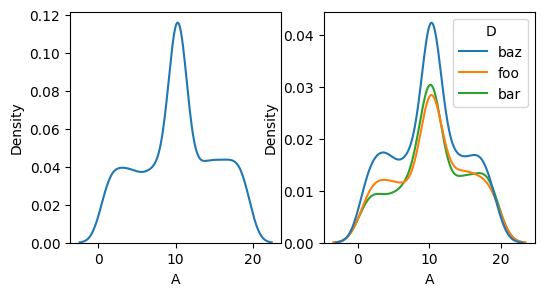

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.kdeplot(data=df, x='A', ax = ax[0])
sns.kdeplot(data=df, x='A', hue='D', ax = ax[1])

Мы сломали распределение... Почему? Какой вывод можно сделать?

## Сделаем заполнение колонки `C`

Однако, сперва оценим распределение.

<Axes: xlabel='C', ylabel='Density'>

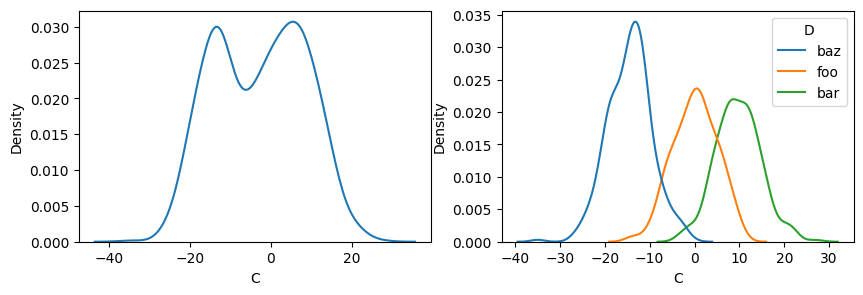

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(data=df, x='C', ax = ax[0])
sns.kdeplot(data=df, x='C', hue='D', ax = ax[1])

Видим, что в этом признаке наблюдения явно зависят от значения группирующей переменной (фичи) `D`. Видится логичным заполнить средним не по всей колонке а средними по каждой группе. Получим эти средние:

In [ ]:
mean_dict = {  label:df.loc[df.D == label, 'C'].mean().round(2) for label in df.D.unique() }
mean_dict

{'baz': -14.43, 'foo': 0.12, 'bar': 9.72}

Однако как эти значения "засунуть" в fillnа()?
Сформируем соразмерную датафрейму серию:

In [ ]:
df.D.map(mean_dict).head()

,D
0,-14.43
1,-14.43
2,-14.43
3,0.12
4,-14.43


Теперь мы для заполнения можем брать эту серию. Для каждого NaN будет подтянуто значение по соответствующему индексу из серии со средними значениями.

In [ ]:
df.C.fillna(df.D.map(mean_dict), inplace=True)

Оценим результат:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1500 non-null   float64
 1   B       302 non-null    float64
 2   C       1500 non-null   float64
 3   D       1500 non-null   object 
dtypes: float64(3), object(1)
memory usage: 47.0+ KB


<Axes: xlabel='C', ylabel='Density'>

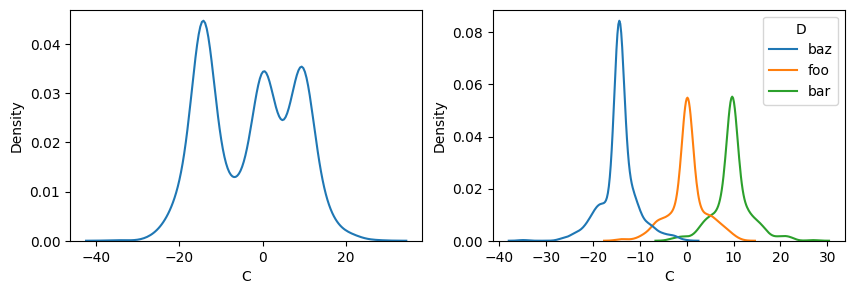

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(data=df, x='C', ax = ax[0])
sns.kdeplot(data=df, x='C', hue='D', ax = ax[1])

Результат удовлетворительный. Однако колонку `B` мы так заполнять не будем. Почему?

## `dropna()`

Функция удаления строк или столбцов где есть пропуски. По дефолту она удалит строки, где есть хотя бы один пропуск. Если указать `axis=1`, то будут удалены столбцы, где есть хоть один пропуск. Чтобы не быть столь радикальными, рассмотрим параметры:

* `axis` = 0/1 - по строкам или столбцам
* `how`='all' - удалит только те строки (столбцы) где все значения пропущены
* `thresh` = 4 - порог. Указывает, сколько минимум должно быть непустых значений. Если непустых значений меньше, то строка (столбец) удаляется.
* `subset` = [...] - список колонок, с которыми работает функция.
* `inplace` - no comments)))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1500 non-null   float64
 1   B       302 non-null    float64
 2   C       1500 non-null   float64
 3   D       1500 non-null   object 
dtypes: float64(3), object(1)
memory usage: 47.0+ KB


У нас осталась одна колонка с пропусками. Давайте оценим степень ее заполненности.

In [ ]:
part = (df.B.notnull().sum() / df.shape[0] * 100).round()
print(f'Колонка заполнена на {part} %.')

Колонка заполнена на 20.0 %.


Очень распространена практика, когда колонка, которая заполнена менее чем на 30% удаляется. Давайте удалим все колонки, которые заполнены менее чем на 30%: (с целью научиться писать код для общего случая)

In [ ]:
min_num_val = int(round(df.shape[0]*.3))
min_num_val # столько должно быть минимум непустых значений в столбце для 30% порога

450

In [ ]:
df.dropna(thresh=min_num_val, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1500 non-null   float64
 1   C       1500 non-null   float64
 2   D       1500 non-null   object 
dtypes: float64(2), object(1)
memory usage: 35.3+ KB


Поработаем со строками. Сгенерим заново датасет.

In [ ]:
df = get_data(1500)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1198 non-null   object 
 1   B       272 non-null    float64
 2   C       907 non-null    float64
 3   D       1500 non-null   object 
dtypes: float64(2), object(2)
memory usage: 47.0+ KB


Посмотрим, сколько в каждой строке пропусков

In [ ]:
df.isnull().sum(axis=1).describe()[['mean', 'min', 'max']]

,0
mean,1.415333
min,0.000000
max,3.000000


Видим, что есть строки, где все три количественных значений пропущены. (Скорее всего так будет). Удалим те строки, где есть больше чем один пропуск. Тогда в строке должно остаться минимум 3 непустых значений.

In [ ]:
df.dropna(axis=0, thresh=3, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       829 non-null    object 
 1   B       245 non-null    float64
 2   C       768 non-null    float64
 3   D       857 non-null    object 
dtypes: float64(2), object(2)
memory usage: 33.5+ KB


In [ ]:
df.isnull().sum(axis=1).describe()[['mean', 'min', 'max']]

,0
mean,0.850642
min,0.000000
max,1.000000


## Вывод

Мы познакомились с некоторыми простейшими приемами работы с пропусками. Однако существуют более продвинутые подходы работы с ними. Мы всегда принимаем рашение, как заполнять или удалять пропуски, исходя из специфики данных. Мы обращаем внимание на распределение и на зависимость от других признаков. Нам нельзя нарушать существующие зависимости и также нежелательно просто удалять значения так как это приводит к потере ценных данных. Часто при заполнении пропусков прибегают, например, к предсказанию того, каково наиболее вероятно значение той ячейки, где имеется пропуск с точки зрения значений в других колонках. Для этого необходимо глубокое изучение данных, построение трендов, зависимостей итд...

## Duplicates

Давайте сформируем датафрейм с дупликатами и поработаем с ним.

In [ ]:
df = get_data(1000)
df = pd.concat([df, df.sample(100)], axis=0) # выборка из 100 случайных строк и добавление ее в конец
df = df.sort_index().reset_index(drop=True) # приведение индексов в порядок
df

,A,B,C,D
0,NaN,NaN,NaN,baz
1,NaN,NaN,NaN,baz
2,3,NaN,-12.735696,baz
3,19,NaN,NaN,bar
4,1,NaN,-20.108552,baz
...,...,...,...,...
1095,1,NaN,NaN,baz
1096,9,NaN,-13.028905,baz
1097,18,NaN,NaN,foo
1098,16,NaN,NaN,bar


## `df.duplicated(col:str|list, keep='last'|'first'|False)`

Возвращает булевый массив, где `True` соответствует повтору.

* `keep` = 'first' - Будут указаны сами элементы, которые ниже имеют дупликаты.
* `keep` = 'last' - Будет показан последний дупликат для каждого элемента.
* `keep` = False - для каждого элемента True пометит и сам элемент, который имеет повтор и все повторы.

In [ ]:
df.duplicated().sum() # столько строк, которые имеют повторы

346

In [ ]:
df.duplicated('D').sum()

1097

## `df.drop_duplicates(col:str|list, keep='last'|'first'|False, ...)`

In [ ]:
df.shape

(1100, 4)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(754, 4)

# Practical part

## Create DataFrame

In [ ]:
brend  = ['Kia', 'Hyundai']
model = ['Rio', 'Solaris']
mod_dict = {'Kia': 'Rio', 'Hyundai': 'Solaris'}
production_year = np.random.randint(2017, 2023, 400)
bin = np.random.randint(0, 2, 400)
br_col = [brend[i] for i in bin]
engine_type = [[1.4, 1.6][i] for i in bin]
engine_type = [[1.4, 1.6][i] for i in bin]
transmission = [['Auto', 'Manual'][i] for i in bin]

In [ ]:
df = pd.DataFrame()
df['brend'] = br_col
df['model'] = df.brend.map(mod_dict)
df['production_year'] = production_year
df['mileage'] = df.production_year.map(lambda i: np.random.randint((2023-i)*10000, (2023-i)*50000, 1)[0].astype(str) + ' km')
df['engine_type'] = engine_type
df['transmission'] = transmission
df['USD_price'] = df.production_year.map(lambda i: np.random.randint(16000*(1 - (2023-i)*0.15), 15000*(1 - (2023-i)*0.05), 1)[0])
df.loc[df['engine_type']==1.4, 'USD_price'] *= 0.93
df.loc[df['transmission']=='Manual', 'USD_price'] *= 0.95
df.loc[df['transmission']=='Manual', 'USD_price'] *= 0.95
df['mileage_int'] = df.mileage.map(lambda i: int(i.replace(' km', '')))
df.loc[df['mileage_int'] > 100000, 'USD_price'] *= 0.88
df.loc[df['mileage_int'] > 150000, 'USD_price'] *= 0.92
df.loc[np.random.randint(0, 401, 5).tolist(), 'production_year'] = np.nan
df.loc[np.random.randint(0, 401, 5).tolist(), 'mileage'] = np.nan
df.drop('mileage_int', axis=1, inplace=True)
df = pd.concat([df, df.sample(100)], axis=0)
df = df.sort_index().reset_index(drop=True)

<ipython-input-5-01017072e53d>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[10736.85  6702.51 11039.1   4495.62  9466.47  2470.08  6570.45 10436.46
  2207.82  9018.21  9438.57  3510.75  9853.35 10570.38 11047.47  8784.78
 10444.83  8556.93  9759.42 12044.43  6667.17  6270.99 10510.86  7074.51
 10694.07  4869.48  6036.63  7610.19 11623.14 13095.33  5264.73 11027.94
  4935.51 11590.59 13134.39  9011.7   9953.79 12742.86  7385.13  9417.18
  7187.97  7457.67  9552.03  6613.23 12987.45 10701.51  8609.94  6855.96
 13206.93 12827.49 10965.63  6144.51  6085.92 12765.18  7161.93 13203.21
 10636.41 10687.56 12791.22 10860.54 12939.09 10006.8  11615.7   8403.48
 12917.7   7866.87 13201.35  7196.34 13180.89 12697.29  7931.04 10597.35
 12144.87  8138.43 12068.61 11679.87 10521.09  9654.33 11288.34  8263.05
  9101.91  7586.94  9372.54  6845.73 10495.98 10761.96  9453.45  7716.21
 11744.97 12738.21  8019.39  9538.08 12933.51

In [ ]:
df

,brend,model,production_year,mileage,engine_type,transmission,USD_price
0,Hyundai,Solaris,2019.0,90478 km,1.6,Manual,10728.017500
1,Hyundai,Solaris,2021.0,70766 km,1.6,Manual,10642.280000
2,Hyundai,Solaris,2017.0,98000 km,1.6,Manual,5303.992500
3,Hyundai,Solaris,2017.0,98000 km,1.6,Manual,5303.992500
4,Hyundai,Solaris,2019.0,88887 km,1.6,Manual,6876.147500
...,...,...,...,...,...,...,...
495,Kia,Rio,2020.0,99922 km,1.4,Auto,11221.380000
496,Hyundai,Solaris,2018.0,193704 km,1.6,Manual,5765.669624
497,Hyundai,Solaris,2020.0,122717 km,1.6,Manual,9228.604000
498,Kia,Rio,2017.0,176633 km,1.4,Auto,3553.067232


## Task_1

Мы сгенерили датасет, посвященный продажам известных марок авто.

Давайте его изучим, посмотрим пропуски, типы данных в колонках и те колонки, которые можно сделать числовыми сделаем таковыми. Удалим дупликаты!!!

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head(3)

,brend,model,production_year,mileage,engine_type,transmission,USD_price
0,Hyundai,Solaris,2019.0,90478 km,1.6,Manual,10728.0175
1,Hyundai,Solaris,2021.0,70766 km,1.6,Manual,10642.2800
2,Hyundai,Solaris,2017.0,98000 km,1.6,Manual,5303.9925


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brend            400 non-null    object 
 1   model            400 non-null    object 
 2   production_year  395 non-null    float64
 3   mileage          395 non-null    object 
 4   engine_type      400 non-null    float64
 5   transmission     400 non-null    object 
 6   USD_price        400 non-null    float64
dtypes: float64(3), object(4)
memory usage: 25.0+ KB


In [ ]:
df.mileage = df.mileage.str.replace(' km', '').astype(float)

In [ ]:
df.head(3)

,brend,model,production_year,mileage,engine_type,transmission,USD_price
0,Hyundai,Solaris,2019.0,90478.0,1.6,Manual,10728.0175
1,Hyundai,Solaris,2021.0,70766.0,1.6,Manual,10642.2800
2,Hyundai,Solaris,2017.0,98000.0,1.6,Manual,5303.9925


## Task_2

Давайте проверим, есть ли тут строки, где встречается 2 раза NaN. Если такие строки есть, дропнeм их.

In [ ]:
df.dropna(subset=['production_year',	'mileage'], thresh = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brend            400 non-null    object 
 1   model            400 non-null    object 
 2   production_year  395 non-null    float64
 3   mileage          395 non-null    float64
 4   engine_type      400 non-null    float64
 5   transmission     400 non-null    object 
 6   USD_price        400 non-null    float64
dtypes: float64(4), object(3)
memory usage: 25.0+ KB


## Task_3

Давайте создадим колонку со средней стоимостью авто по годам выпуска.

И колонку со средним пробегом по годам выпуска.

Покажите на графике средние пробеги и средние стоимости по годам выпуска.

## Task_4

Наша задача по-умному заполнить пропуски в колонке "Пробег".. Если мы просто заполним средними то это может сломать зависимость между ценой и пробегом, а она по логике вещей существенна.

У нас есть средние пробега и и стоимости по годам. Нужно заполнить пропуски значением около среднего с учетом года выпуска но так, чтобы пробег был больше среднего, если цена ниже среднего и нгаоборот. Давайте подумаем, как это сделать...

In [ ]:
df.columns

Index(['brend', 'model', 'production_year', 'mileage', 'engine_type',
       'transmission', 'USD_price', 'mean_price', 'mean_mileage'],
      dtype='object')

## Task_5

У нас таже присутствуют пропуски в колонке Год выпуска.

Давайте также как-то по-умному их заполним!) Должно получиться)

In [ ]:
df.production_year.unique()

array([2022., 2021., 2017., 2019., 2020., 2018.,   nan])

<Axes: xlabel='production_year', ylabel='USD_price'>

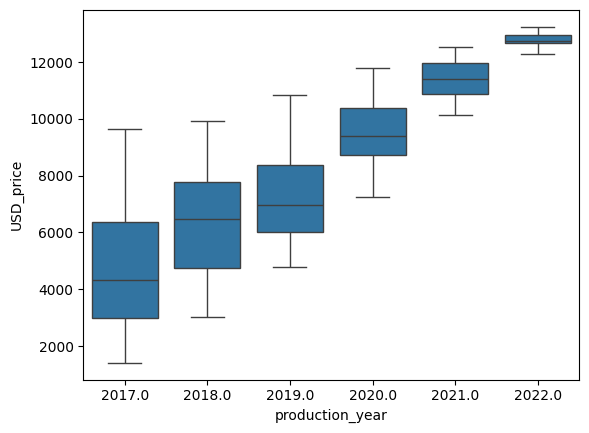

In [ ]:
sns.boxplot(x = df.production_year, y = df.USD_price)

<Axes: xlabel='production_year', ylabel='mileage'>

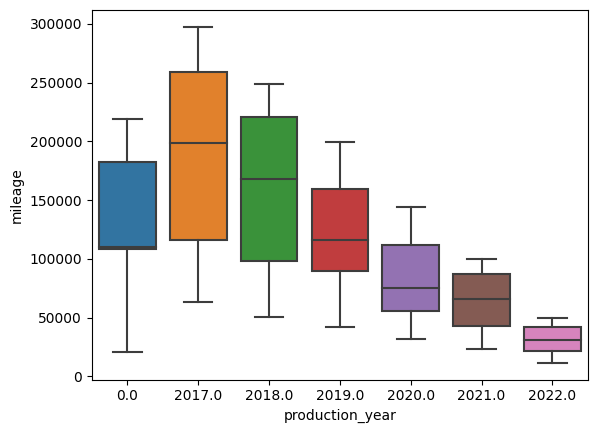

In [ ]:
sns.boxplot(x = df.production_year, y = df.mileage)

## Task_6

Давайте оценим, как в среднем много автомобиль проезжает за год независимо от типа двигателя и трансмиссии.

<Axes: xlabel='mileage', ylabel='USD_price'>

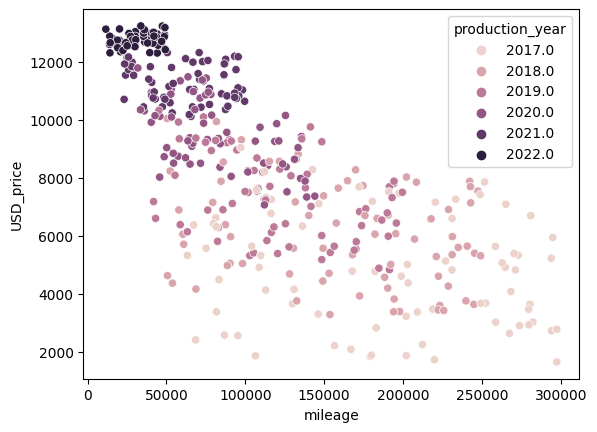

In [ ]:
sns.scatterplot(x='mileage', y = 'USD_price', data = df, hue='production_year')

<Axes: xlabel='production_year', ylabel='USD_price'>

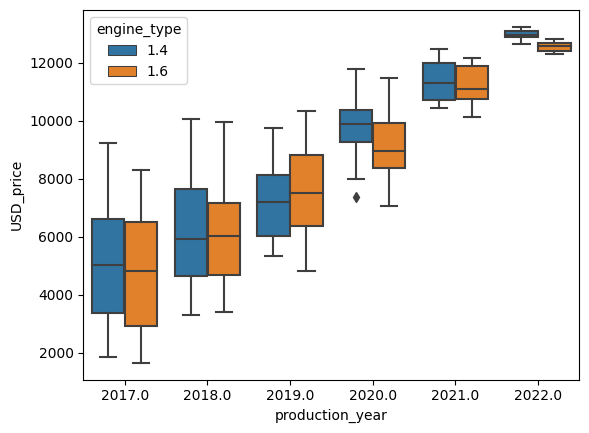

In [ ]:
sns.boxplot(y = df.USD_price, x=df.production_year, hue = df.engine_type)